## Notebook Setup

### Imports
* **Run this cell immediately after opening the notebook by placing the cursor in the cell and hitting `SHIFT + ENTER`.**
* Otherwise, leave this cell alone

In [1]:
# Imports for telling Python where to find IRScout Python modules
import sys
import os
import re
sys.path.append('..\\Server')
    
# Set Current working directory to irsScouting2017\\Server
ptn = re.compile("jupyter$")
if ptn.search(os.getcwd()) is not None:
    os.chdir("..\\Server")

# IRScout Python Modules
import scouting.output as out
from scouting.event import EventDal

# Other useful modules
import pandas as pd
import sqlalchemy as sa

# Get a database connection
connection_string = ('postgresql://irs1318:irs1318'
                     '@localhost:5432/scouting')
engine = sa.create_engine(connection_string)
conn = engine.connect()

In [2]:
# Use the Bokeh plotting package
import holoviews as hv
hv.extension("bokeh")

AttributeError: module 'pandas.core.computation' has no attribute 'expressions'

In [3]:
os.getcwd()

'C:\\Users\\stacy\\OneDrive\\Projects\\irsScouting2018\\Server'

### Set Defaults
### Set Event
* **Next, set `current_event` to the applicable FIRST API event code and run this cell.**

In [3]:
# Set Current Event
current_event = "turing"
EventDal.set_current_event(current_event)
EventDal.get_current_event()

'turing'

### Export Excel Ranking File
* Run this cell to export the rankings spreadsheet.

In [4]:
fpath = out.get_Path("Report")
out.get_report(fpath)

### Get a Dataframe Containing all Measures

In [5]:
# Get Measures Dataframe
sql_measures = sa.text(
    "SELECT events.name AS event, matches.name AS match, levels.name AS level, dates.name AS date, "
    "teams.name AS team, alliances.name AS alliance, "
    "stations.name AS station, phases.name AS phase, actors.name AS actor, tasks.name AS task, "
    "measures.capability AS capability, measures.successes as successes, measures.attempts AS attempts, "
    "measures.cycle_times as cycle_times, measuretypes.name AS measuretype, reasons.name AS reason, "
    "attempts.name AS attempt "
    "FROM ((((((((((((measures FULL OUTER JOIN teams ON measures.team_id=teams.id) "
    "LEFT JOIN events ON measures.event_id=events.id) "
    "LEFT JOIN matches ON measures.match_id=matches.id) "
    "LEFT JOIN levels ON measures.level_id=levels.id) "
    "LEFT JOIN dates ON measures.date_id=dates.id) "
    "LEFT JOIN alliances ON measures.alliance_id=alliances.id) "
    "LEFT JOIN stations ON measures.station_id=stations.id) "
    "LEFT JOIN phases ON measures.phase_id=phases.id) "
    "LEFT JOIN actors ON measures.actor_id=actors.id) "
    "LEFT JOIN tasks ON measures.task_id=tasks.id) "
    "LEFT JOIN reasons ON measures.reason_id=reasons.id) "
    "LEFT JOIN measuretypes ON measures.measuretype_id=measuretypes.id) "
    "LEFT JOIN attempts ON measures.attempt_id=attempts.id "
    "WHERE events.name='" + current_event + "';")
measures = pd.read_sql(sql_measures, conn)
measures.query("task == 'shootHighBoiler'").query("phase == 'auto' or phase == 'teleop'")
#measures.query("task == 'climbRope' and phase == 'finish'")"

,event,match,level,date,team,alliance,station,phase,actor,task,capability,successes,attempts,cycle_times,measuretype,reason,attempt
9,turing,002-q,qual,2017-04-20T08:38:00,2990,blue,3,auto,robot,shootHighBoiler,0,0,0,0,count,na,summary
84,turing,005-q,qual,2017-04-20T09:02:00,1165,red,3,auto,robot,shootHighBoiler,0,1,1,0,count,na,summary
128,turing,004-q,qual,2017-04-20T08:54:00,108,blue,2,teleop,robot,shootHighBoiler,0,1,10,0,count,na,summary
217,turing,006-q,qual,2017-04-20T09:10:00,1595,blue,2,auto,robot,shootHighBoiler,0,1,1,0,count,na,summary
295,turing,008-q,qual,2017-04-20T09:26:00,3937,blue,1,teleop,robot,shootHighBoiler,0,0,4,0,count,na,summary
368,turing,009-q,qual,2017-04-20T09:34:00,2907,blue,3,auto,robot,shootHighBoiler,0,0,1,0,count,na,summary
382,turing,010-q,qual,2017-04-20T09:42:00,283,blue,3,auto,robot,shootHighBoiler,0,10,10,0,count,na,summary
399,turing,012-q,qual,2017-04-20T09:58:00,1595,red,3,auto,robot,shootHighBoiler,0,1,9,0,count,na,summary
413,turing,012-q,qual,2017-04-20T09:58:00,2102,red,2,auto,robot,shootHighBoiler,0,14,14,0,count,na,summary
448,turing,012-q,qual,2017-04-20T09:58:00,4586,blue,3,teleop,robot,shootHighBoiler,0,22,22,0,count,na,summary


### Get Number of Completed Matches"

In [6]:
# Set recent_matches to n to filter out all but the last n matches.
recent_matches= 12

select_recent_matches = sa.text(
    "with current AS (SELECT s.event, s.match, date from schedules sched, "
    "status s WHERE sched.event = s.event "
    "AND sched.match = s.match limit 1 ) "


    "SELECT * FROM ( "
    "SELECT row_number() over (partition by team order by sched.date desc) as r, "
    " sched.* from schedules sched, current c WHERE sched.event = c.event and sched.date <= c.date )"
    " row_schedule WHERE row_schedule.r <= " + str(
        recent_matches) + " ORDER by team, date desc")
df = pd.read_sql(select_recent_matches, conn)
num_matches = df[['team', 'level']].groupby('team').count()
num_matches.columns = ['matches']

### Create and Save Gears Chart
* This cell creates the gears chart and saves it to Server/web/data as a static, interactive html file.

**TODO:** Add an event code and timestamp to gears chart file name.

In [15]:
# Create summary data frame for placing gears
gears_df = measures.query("task == 'placeGear'").query("phase == 'auto' or phase == 'teleop'").groupby('team').sum()
gears_df['average'] = gears_df['successes'] / num_matches['matches']
gears_df = gears_df.sort_values('average', ascending = False)

gears_df.head()

,capability,successes,attempts,cycle_times,average
team,,,,,
1296,0,47,50,0,4.700000
4206,0,47,54,0,4.700000
3737,0,44,46,0,4.400000
399,0,46,50,0,4.181818
3245,0,41,46,0,4.100000


<IPython.core.display.Javascript object>


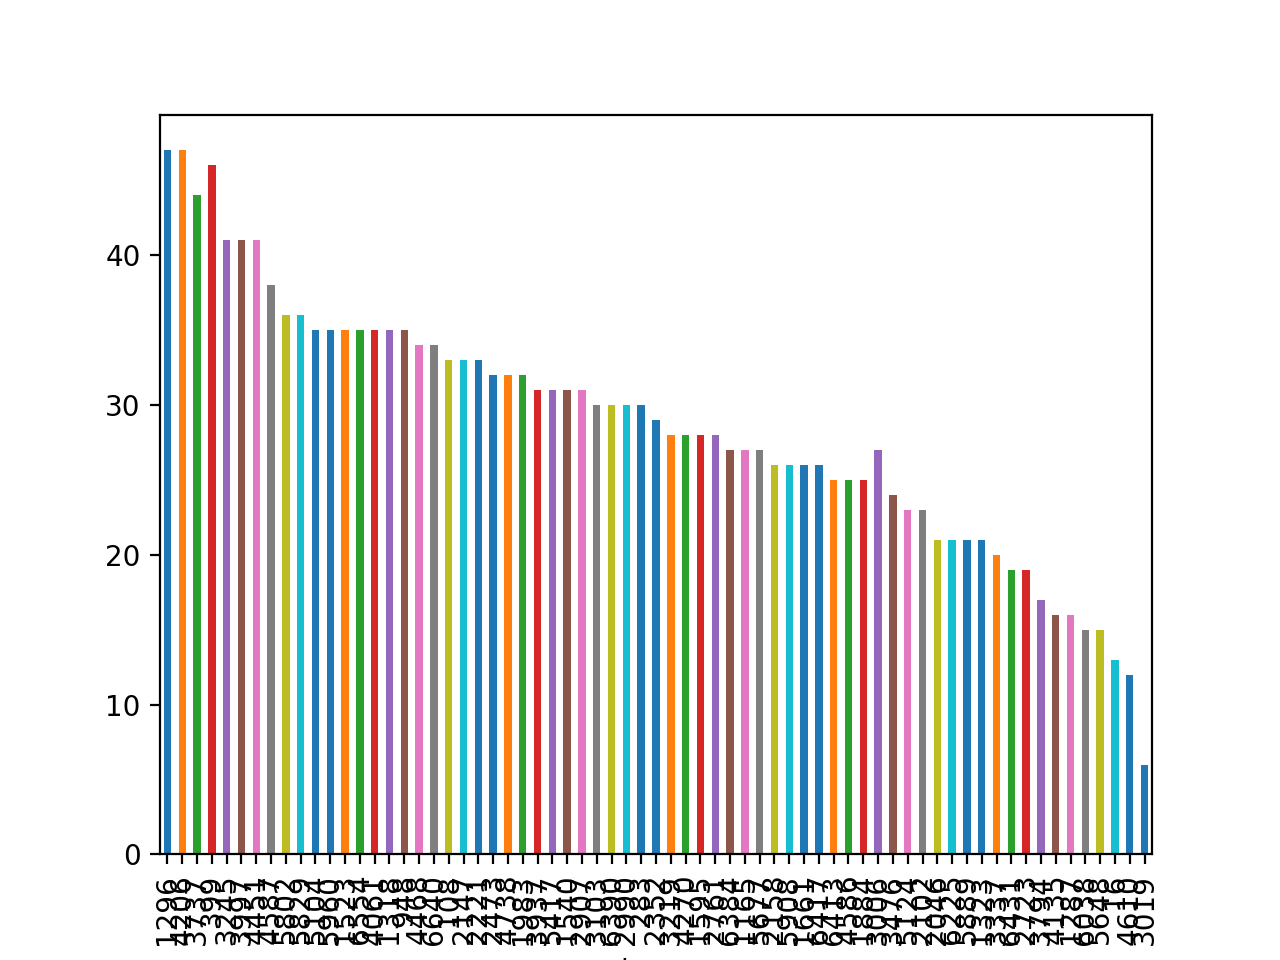

In [17]:
%matplotlib notebook
gears_df.loc[:, "successes"].plot(kind='bar')

In [11]:
# Create summary data frame for climbing rope
climbs_df = measures.query("task == 'climbRope'").query("phase == 'finish'").groupby('team').count()
climbs_df['average'] = climbs_df['successes'] / num_matches['matches']
climbs_df = climbs_df.sort_values('average', ascending = False)

# Create gears chart in Bokeh
climb_chart = bc.Bar(climbs_df, values = 'average', label = bca.cat(sort = False), legend = None, color = 'DarkGoldenRod',
                   title = 'Total Times Climbed', ylabel = "Times Climbed")
bc.output_file('web/data/climb_chart.html', mode = 'inline')
bc.show(climb_chart)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='024c446a-bae2-42c0-8529-5c250e907804', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='02c73eb0-9cfb-47a8-9d70-41636d6e1331', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='05a379e1-a743-4d9f-98f7-32b643276a58', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='0dc31929-cd72-4847-b56e-41aa625de4e7', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='11ff7544-4f5b-4c4c-9526-ce746a89419e', ...)
E-1010 (CDSVIEW

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='b1ff0d65-2254-46d7-b1eb-50f49eb6fcc5', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='b612bb98-7616-4142-83ff-3816787f27fc', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='b7246b0e-4b7c-4d32-b83d-99ef312244bf', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='b9d2db2e-e4b8-4395-bd38-431bb6ab2391', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='ba842452-f386-4590-8ac0-4e94ed4a6a45', ...)
E-1010 (CDSVIEW

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='06dbcf28-d050-43d3-b5a0-6749890fb89c', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='081cbfaf-a674-4fb8-be21-a872a8d9eedc', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='114e9fd4-5985-46d5-90f5-83ea07d82ca1', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='143975d7-a226-4a3d-900e-d86d3549d17d', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='16007e26-f434-41b1-b675-6677c18574eb', ...)
E-1010 (CDSVIEW

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='980a4e81-62e2-4af7-a2d6-a497d70725f3', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='9936a510-11f7-4251-b66e-eeaae8839f0d', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='9af5c8b3-88a6-4b72-b9e6-9f0099bce31e', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='9d4d0cbf-2146-4d85-aa91-a8096f1bd525', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='a0e5fb8f-a2a8-4b5f-9128-0a13677534e4', ...)
E-1010 (CDSVIEW

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='47f252eb-1fa6-4ff4-a181-02f260d9a1a7', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='525cf473-f9ab-4e92-806c-2501782e04c6', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='54e861c9-d0c3-4905-99d2-66151bb64a0b', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='5a44767d-7b3b-4d43-b2c0-78c01465f502', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='5eeca996-0684-4ead-b053-5df8f526f177', ...)
E-1010 (CDSVIEW

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='df1a15a3-4c40-4d6d-9699-59d8e23c7bf8', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='e075f222-a3bd-4335-99e6-6a58d42713f3', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='e76a0bfa-15e0-40fe-865b-9cb687ca0768', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='e8cf0879-a83c-4cfd-a033-afb5bac2edbb', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='ea513726-51f6-4bad-bfe9-57bc3f0ce464', ...)
E-1010 (CDSVIEW